In [1]:
INSTANCE_ID = '31bd9585-8cfe-4fa3-aa15-5f1b528ab12e'

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import datetime
import numpy as np

import matplotlib.pyplot as plt

In [4]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

In [5]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [6]:
betsiboka_coords_wgs84 = [46.16, -16.15, 46.51, -15.58]

In [7]:
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)

In [8]:
wms_true_color_request = WmsRequest(layer='TEST',
                                    bbox=betsiboka_bbox,
                                    time='2017-12-15',
                                    width=512, height=856,
                                    instance_id=INSTANCE_ID)

In [9]:
wms_true_color_img = wms_true_color_request.get_data()

In [11]:
print(wms_true_color_img[0].shape)
print(wms_true_color_img)

(856, 512)
[array([[  0,   0,   0, ...,  63,  47,  49],
       [  0,   0,   0, ...,  76,  69,  63],
       [  0,   0,   0, ...,  84,  95,  70],
       ...,
       [199, 189, 200, ...,  30,  35,  36],
       [196, 193, 202, ...,  34,  35,  46],
       [201, 200, 195, ...,  43, 125,  57]], dtype=uint8)]


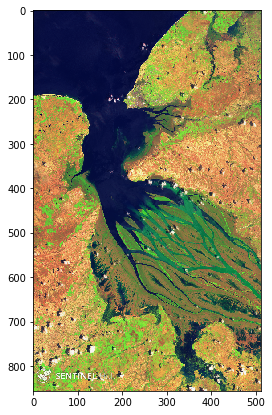

In [17]:
plot_image(wms_true_color_img[0])

In [18]:

wms_bands_request = WmsRequest(layer='TEST',
                               bbox=betsiboka_bbox,
                               time='2017-12-15',
                               width=512, height=856,
                               image_format=MimeType.TIFF_d32f,
                               instance_id=INSTANCE_ID)
wms_bands_img = wms_bands_request.get_data()

In [20]:
wms_bands_img[-1].shape

(856, 512, 13)

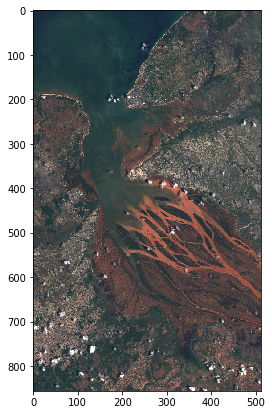

In [21]:
plot_image(wms_bands_img[-1][:, :, [3, 2, 1]], 2.5)

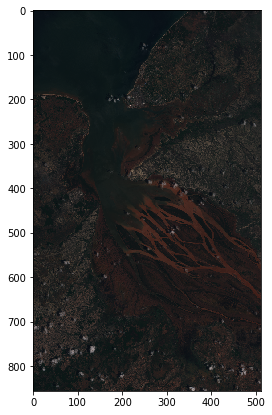

In [22]:
plot_image(wms_bands_img[-1][:, :, [3, 2, 1]]) # factor really matter

In [23]:
wms_bands_request = WmsRequest(data_folder='./all_bands',
                               layer='BANDS',
                               bbox=betsiboka_bbox,
                               time='2017-12-15',
                               width=512, height=856,
                               image_format=MimeType.TIFF_d32f,
                               instance_id=INSTANCE_ID)

In [24]:
%%time
wms_bands_img = wms_bands_request.get_data(save_data=True)

Wall time: 3min 42s


# download all reflectance images(13 bands)

In [27]:
# convert my geojson coors to wgs84 coord system
# https://mygeodata.cloud/converter/geojson-to-latlong
import pygeoj
testfile = pygeoj.load(filepath="../aoi.geojson")

# my wgs84 coordinates 
aoi_wgs84 = testfile.bbox
print(aoi_wgs84)

[79.96983110904694, 7.084400873410644, 79.97372031211853, 7.08574770774949]


In [ ]:
wms_bands_req = WmsRequest(data_folder='./all_bands',
                               layer='BANDS',
                               bbox=betsiboka_bbox,
                               time='2017-12-15',
                               width=512, height=856,
                               image_format=MimeType.TIFF_d32f,
                               instance_id=INSTANCE_ID)